<div dir=rtl>
<font color='red' size="6">آماده سازی نوت بوک</font>
<div dir=rtl>

><font size = "4"> 1.  قبل از هر کاری، با استفاده از مسیر نوشته شده در خط پایین، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.



<div dir=ltr>
<font size = "4" color='blue'>
File --> Save a copy in Drive
</font>
<div dir=rtl>

><font size = "4"> 2.   برای دسترسی به تصاویر مورد نیاز در این تکلیف، بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید. با این کار فایل های مربوط به تکلیف (تصاویر) دانلود و در فولدر کولب شما قرار داده می شوند. انجام این مرحله پس از هر بار قطع شدن از کولب و اتصال دوباره، ضروری است. یعنی اگر مثلا یک سوال را حل کردید و بعد کولب را بستید یا مدتی با آن کار نکردید و اتصالتان به طور خودکار قطع شد، در اقدام بعدیتان برای نوشتن بقیه‌ی تمرین، حتما این بلوک باید دوباره اجرا شود.

In [2]:
#@title RUN THIS BLOCK WITHOUT ANY CHANGE to download the data
!wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1_AbCo7shlrAPA5C3ub8smakCCdNnaRbG&export=download&authuser=0&confirm=t&uuid=d1fa3111-dbfc-414e-84e3-c4e66c004c00&at=APZUnTUhB_03yvHtcoJ3grMv6-IG:1698755987446' -O 'DIP_HW2.zip'
!unzip DIP_HW2.zip

--2023-12-01 15:14:53--  https://drive.usercontent.google.com/download?id=1_AbCo7shlrAPA5C3ub8smakCCdNnaRbG&export=download&authuser=0&confirm=t&uuid=d1fa3111-dbfc-414e-84e3-c4e66c004c00&at=APZUnTUhB_03yvHtcoJ3grMv6-IG:1698755987446
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 445128 (435K) [application/octet-stream]
Saving to: ‘DIP_HW2.zip’

DIP_HW2.zip         100%[===================>] 434.70K  --.-KB/s    in 0.03s   

2023-12-01 15:14:54 (13.4 MB/s) - ‘DIP_HW2.zip’ saved [445128/445128]

Archive:  DIP_HW2.zip
  inflating: Blur_Hand.png           
  inflating: Hand.png                
  inflating: noisy_brain.png         


# Imports
<div dir=rtl>
<font color="blue" size="6">فراخوانی کتابخانه ها</font>
<div dir=rtl>




In [3]:
###

# ENTER YOUR CODE HERE.
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
###

# Any Helper Functions

<div dir=rtl>
<font color="blue" size = "4">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید (همه در همین بلوک).</font>
</div>



In [ ]:
###

###

# Question 5: Low Pass Filters (30%)

In [4]:
#@title Q5 - Part 1 (5%)
###

# ENTER YOUR CODE HERE.

noisy_brain=cv2.imread("noisy_brain.png", cv2.IMREAD_GRAYSCALE)
###

پاسخ سوال ۵.۲--برای این نویز استفاده از فیلتر میانه بهتر است.

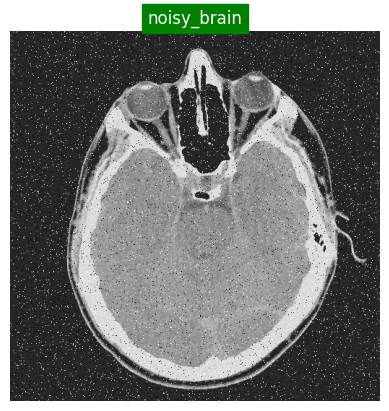

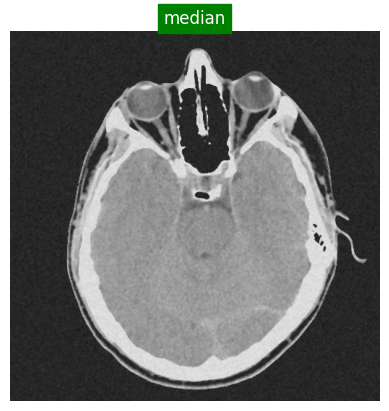

In [5]:
#@title Q5 - Part 2 (10%)
###

# ENTER YOUR CODE HERE.
median = cv2.medianBlur(noisy_brain, 3)
plt.figure()
plt.imshow(noisy_brain, cmap="gray", vmin=0, vmax=255)
plt.title('noisy_brain', color='white', backgroundcolor='green')
plt.axis('off')
plt.figure()
plt.imshow(median, cmap='gray', vmin=0, vmax=255)
plt.title('median', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
###

In [ ]:
#@title Q5 - Part 3 (10%)

# NO CODE REQUIRED FOR THIS PART.

<div dir=rtl><font color='green' size="5">جواب سوال ۵-۳</font>
<div>

<div dir=rtl><font size="4">
دلیل گذاشتن پدینگ این است که فیلتر هنگام قرار گرفتن در لبه ها آنها را از دست ندهد  
زیرا در صورت نبود پدینگ سایز تصویر کوچک میشود.
همچنین دلیل دیگر آن در هنگام گرفتن فوریه اینست که نتیجه تبدیل فوریه تکرار شونده نباشد(حداقل در ابعادی که ما آنرا نیاز داریم). بعبارتی باید مسیله Convolution with
periodicity را به وسیله پدینگ در نظر بگیریم و حل کنیم.

دلیل شیفت دادن فوریه تا انتقال آن به وسط اینست که قسمت های مهم آن که اطلاعات اصلی در آن قرار گرفته اند از لبه های تصویر به مرکز منتقل شود و راحتتر تحلیل شوند و همچنین از نظر ریاضی هم ضرب آن راحتتر میشود..
 </font><br />
</div>

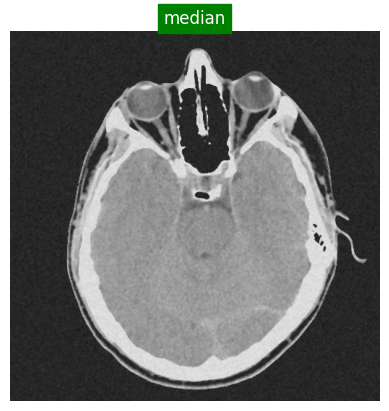

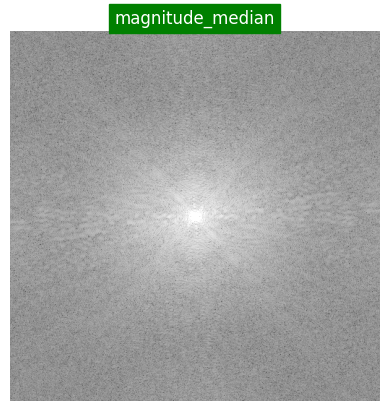

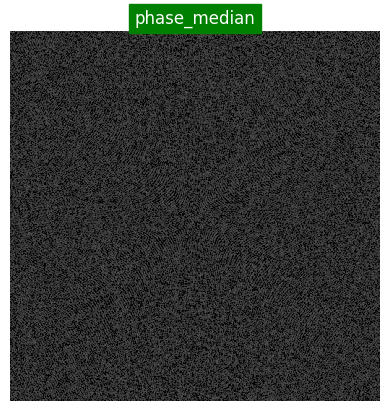

In [14]:
#@title Q5 - Part 4 (25%)
###
# ENTER YOUR CODE HERE.
fourier_median = cv2.dft(np.float32(median), flags=cv2.DFT_COMPLEX_OUTPUT)
fourier_median_shift = np.fft.fftshift(fourier_median)
magnitude_median = 20*np.log(cv2.magnitude(fourier_median_shift[:,:,0],fourier_median_shift[:,:,1]))
phase_median = 50*np.log(cv2.phase(fourier_median_shift[:,:,0],fourier_median_shift[:,:,1]))

plt.figure()
plt.imshow(median, cmap="gray", vmin=0, vmax=255)
plt.title('median', color='white', backgroundcolor='green')
plt.axis('off')
plt.figure()
plt.imshow(magnitude_median, cmap='gray', vmin=0, vmax=255)
plt.title('magnitude_median', color='white', backgroundcolor='green')
plt.axis('off')
plt.figure()
plt.imshow(phase_median, cmap="gray", vmin=0, vmax=255)
plt.title('phase_median', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
###

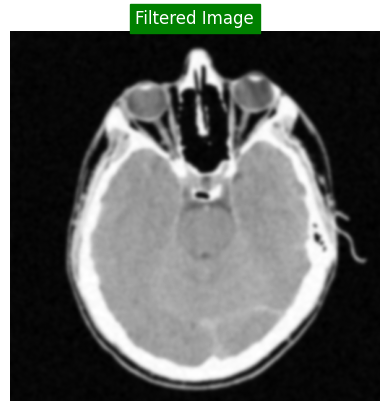

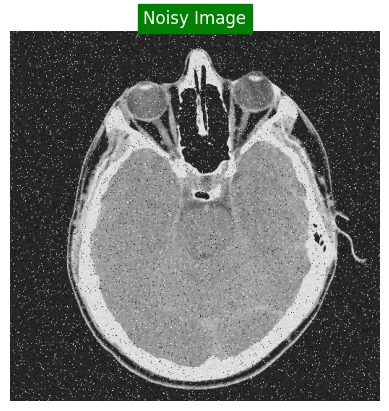

In [ ]:
#@title Q5 - Part 5 (30%)
###
def GLP(image,  d=35):
  filter = np.zeros(image.shape)
  for k in range(image.shape[2]):
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        a = -1 * (pow(i - image.shape[0]/2, 2) + pow(j - image.shape[1]/2, 2))
        b = 2 * pow(d, 2)
        filter[i,j,k] = np.exp(a/b)
  return image * filter
filterd_fourier = GLP(fourier_median_shift)
filterd_fourier_shift = np.fft.ifftshift(filterd_fourier)
image_after_filter = cv2.idft(filterd_fourier_shift)
image_after_filter = cv2.magnitude(image_after_filter[:,:,0], image_after_filter[:,:,1])
image_after_filter=(image_after_filter - np.min(image_after_filter))/(np.max(image_after_filter) - np.min(image_after_filter)) *256
plt.figure()
plt.imshow(image_after_filter, cmap="gray", vmin=0, vmax=255)
plt.title('Filtered Image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
plt.figure()
plt.imshow(noisy_brain, cmap="gray", vmin=0, vmax=255)
plt.title('Noisy Image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
###

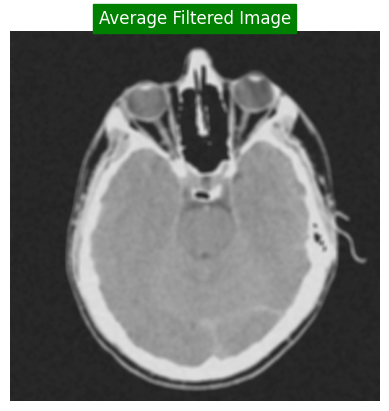

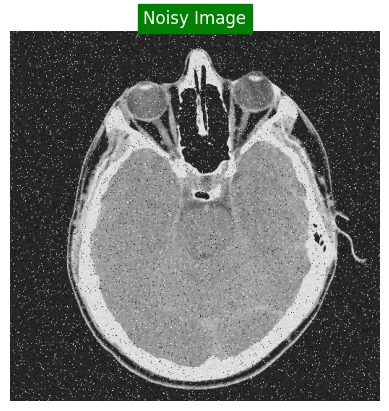

In [ ]:
#@title Q5 - Part 6 (10%)
###

# ENTER YOUR CODE HERE.
average_filter = cv2.GaussianBlur(median, (7,7),cv2.BORDER_DEFAULT)
###
plt.figure()
plt.imshow(average_filter, cmap="gray", vmin=0, vmax=255)
plt.title('Average Filtered Image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
plt.figure()
plt.imshow(noisy_brain, cmap="gray", vmin=0, vmax=255)
plt.title('Noisy Image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال ۵-۶</font>
<div>
<font size="4">
متن مورد نظر در این جا نوشته شود.(برای نوشتن دوبار اینجا کلیک کنید)

 برای رفتن به خط بعد، دو بار اینتر بزنید.
 </font><br />
</div>

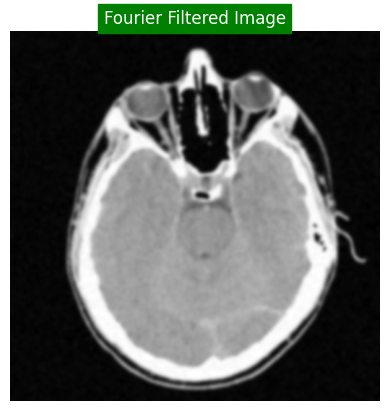

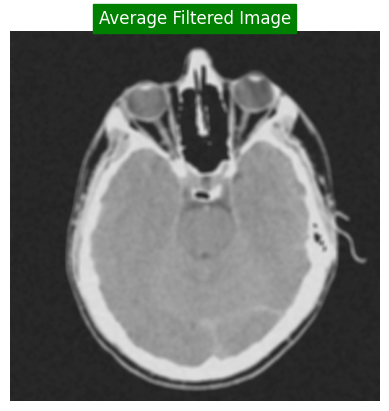

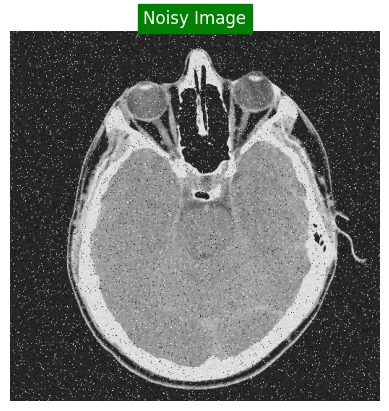

In [ ]:
#@title Q5 - Part 7 (10%)
###
plt.figure()
plt.imshow(image_after_filter, cmap="gray", vmin=0, vmax=255)
plt.title('Fourier Filtered Image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
plt.figure()
plt.imshow(average_filter, cmap="gray", vmin=0, vmax=255)
plt.title('Average Filtered Image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
plt.figure()
plt.imshow(noisy_brain, cmap="gray", vmin=0, vmax=255)
plt.title('Noisy Image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال ۵-۷</font>
<div>
<font size="4">
فیلتر به وسیله تبدل یل فوریه و فیلتر کردن آن بهتر است زیرا در میانگین گیری رنگ های تصویر مقداری بیشتری پخس میشوند و تار تر میشود در حالی که به وسیله فوریه صرفا شدت های با اهمیت کمتر و فرکانس بیشتر حذف میشوند و بخش های مهمتر تصویر باقی میمانند.
 </font><br />
</div>

# Question 6: High Pass Filters (30%)

In [15]:
#@title Q6 - Part 1 (15%)
###

# ENTER YOUR CODE HERE.
def laplacian(image, r):
  kernel = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])
  if r == 90:
      kernel = np.array([[1, 1, 1],[1, -8, 1],[1, 1, 1]])
  pad = np.zeros((image.shape[0]+2, image.shape[1]+2))
  pad[1:-1, 1:-1] = image
  res = np.zeros(image.shape)
  for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            res[r, c] = np.sum(kernel * pad[r:r+3, c:c+3]).clip(0,255).astype(np.uint8)
  return res


###

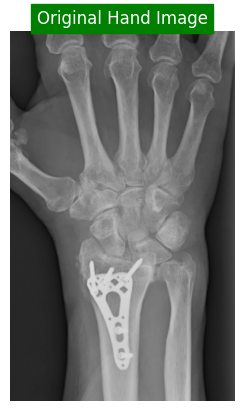

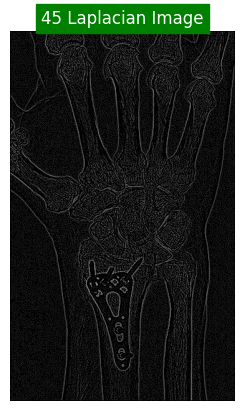

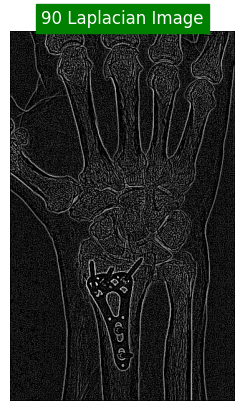

In [20]:
#@title Q6 - Part 2 (15%)
###

# ENTER YOUR CODE HERE.
hand=cv2.imread("Hand.png", cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(hand, cmap="gray", vmin=0, vmax=255)
plt.title('Original Hand Image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
plt.figure()
plt.imshow(20*np.power(laplacian(hand, 45), 0.5), cmap="gray", vmin=0, vmax=255)
plt.title('45 Laplacian Image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
plt.figure()
plt.imshow(20*np.power(laplacian(hand, 90), 0.5), cmap="gray", vmin=0, vmax=255)
plt.title('90 Laplacian Image', color='white', backgroundcolor='green')
plt.axis('off')
plt.show()
###

<div dir=rtl><font color='green' size="5">## توضیحات سوال ۶-۲</font>
<div>

<div dir=rtl><font size="4">
همانطور که مشاهده میشود فیلتر ۴۵ درجه بهتر تفاوت ها را نشان میدهد زیرا در فیلتر ۹۰ درجه تنها در راستای  x و y تفاوت ها مشخص میشوند ولی در  ۴۵ درجه در راستای ۴۵ درجه یا اریب هم  تفاوت ها مشخص میشوتد.
 </font><br />
</div>

In [21]:
#@title Q6 - Part 3 (40%)
###

# ENTER YOUR CODE HERE.
def custom_filter(image, filtername, d):
  fourier = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
  fourier_shift = np.fft.fftshift(fourier)
  filter = np.ones(fourier_shift.shape)
  if(filtername=="IHPF"):
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        if pow(i - image.shape[0]/2, 2) + pow(j - image.shape[1]/2, 2) <= pow(d,2):
          filter[i, j] = 0
  elif(filtername=="BHPF"):
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        filter[i, j] = 1 - 1/(1 + pow((pow(i - image.shape[0]/2, 2) + pow(j - image.shape[1]/2, 2))/pow(d,2) , 2))

  fourier = fourier_shift * filter
  filterd_fourier_shift = np.fft.ifftshift(fourier)
  image_after_filter = cv2.idft(filterd_fourier_shift)
  image_after_filter = cv2.magnitude(image_after_filter[:,:,0], image_after_filter[:,:,1])
  return (image_after_filter - np.min(image_after_filter))/(np.max(image_after_filter) - np.min(image_after_filter)) *256

###

(-0.5, 360.5, 593.5, -0.5)

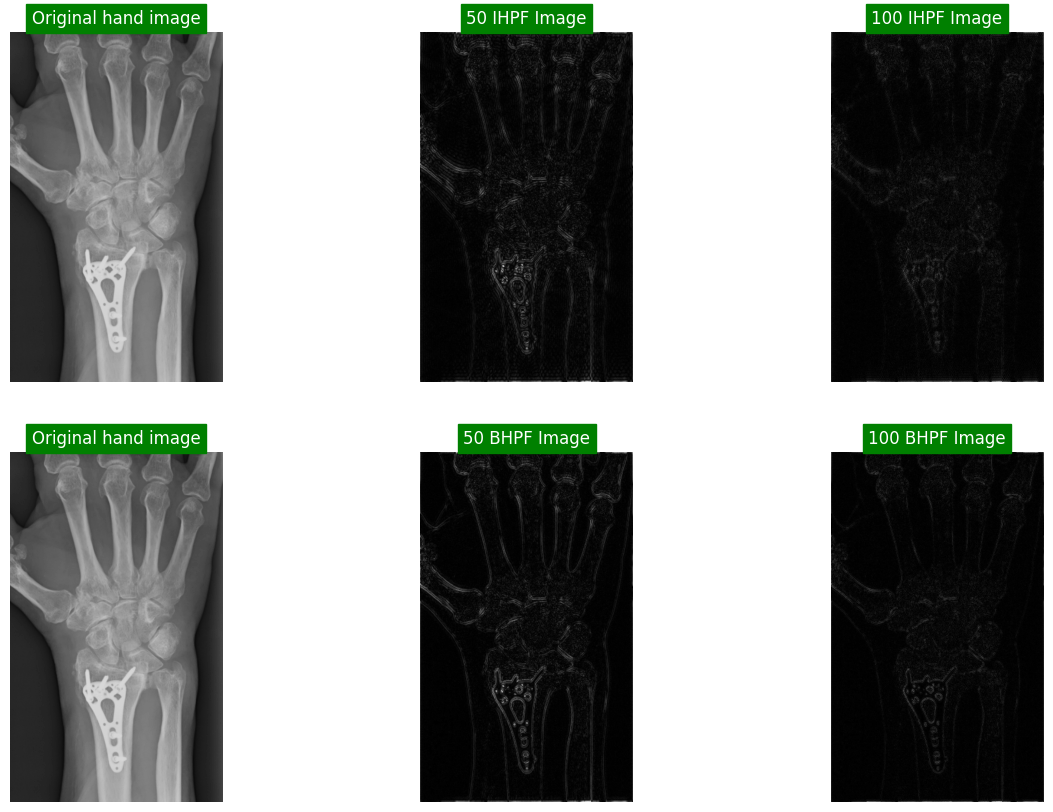

In [22]:
#@title Q6 - Part 4 (15%)
###

# ENTER YOUR CODE HERE.
plt.figure(figsize=(15,10))
plt.subplot(2, 3, 1)
plt.imshow(hand, cmap="gray", vmin=0, vmax=255)
plt.title('Original hand image', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(custom_filter(hand, "IHPF", 50), cmap="gray", vmin=0, vmax=255)
plt.title('50 IHPF Image', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(custom_filter(hand, "IHPF", 100), cmap="gray", vmin=0, vmax=255)
plt.title('100 IHPF Image', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(hand, cmap="gray", vmin=0, vmax=255)
plt.title('Original hand image', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(custom_filter(hand, "BHPF", 50), cmap="gray", vmin=0, vmax=255)
plt.title('50 BHPF Image', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(custom_filter(hand, "BHPF", 100), cmap="gray", vmin=0, vmax=255)
plt.title('100 BHPF Image', color='white', backgroundcolor='green')
plt.axis('off')
###

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال  ۶-۴</font>
<div>
<font size="4">
زیاد شدن شعاع در فیلتر های بالاگذر باعث میشود که اطلاعات بیشتری از تصویر از دست برود و در شکل هم مشخص است که جبا افزایش شعاع جزییات بیشتری از بین میرود.
 </font><br />
</div>

(-0.5, 360.5, 593.5, -0.5)

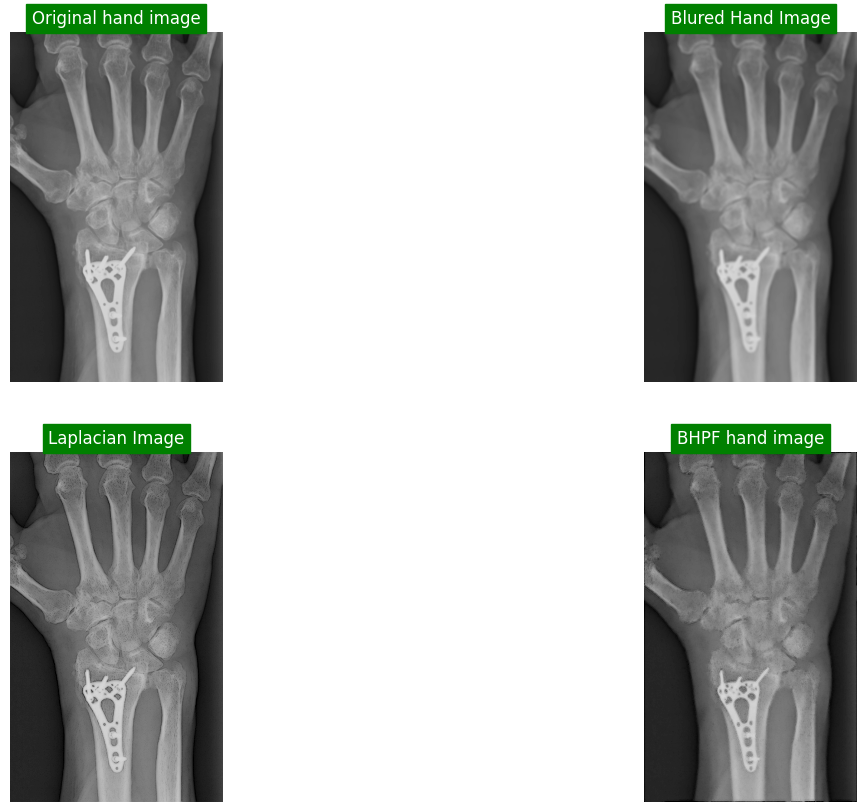

In [31]:
#@title Q6 - Part 5 (15%)
###

# ENTER YOUR CODE HERE.
blur_hand=cv2.imread("Blur_Hand.png", cv2.IMREAD_GRAYSCALE)

# ENTER YOUR CODE HERE.
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
plt.imshow(hand, cmap="gray", vmin=0, vmax=255)
plt.title('Original hand image', color='white', backgroundcolor='green')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(blur_hand, cmap="gray", vmin=0, vmax=255)
plt.title('Blured Hand Image', color='white', backgroundcolor='green')
plt.axis('off')

new_laplacian = blur_hand - 2 * laplacian(hand, 45)

plt.subplot(2, 2, 3)
plt.imshow(new_laplacian, cmap="gray", vmin=0, vmax=255)
plt.title('Laplacian Image', color='white', backgroundcolor='green')
plt.axis('off')

new_bhpf = blur_hand - 1 * custom_filter(hand, "BHPF", 100)

plt.subplot(2, 2, 4)
plt.imshow(new_bhpf, cmap="gray", vmin=0, vmax=255)
plt.title('BHPF hand image', color='white', backgroundcolor='green')
plt.axis('off')
###

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال ۶-۵</font>
<div>
<font size="4">
متن مورد نظر در این جا نوشته شود.(برای نوشتن دوبار اینجا کلیک کنید)

 برای رفتن به خط بعد، دو بار اینتر بزنید.
 </font><br />
</div>